#Import Library for prject

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
%matplotlib inline
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#ฟังก์ชันนี้สามารถโหลด data เเล้วก็ เเบ่ง data ได้ มีของเเถมนั้นก็คือ nomalizer data โดย Standard Scaler
def load_dataset(path = './sample_data/wheat kernels.csv', split_train_test = None):
  standard = StandardScaler()
  if os.path.isfile(path):
    data = pd.read_csv(path)

  else:
    #uri for dowload dataset
    url = '/content/drive/MyDrive/Data Set/final-ML/wheat kernels.csv'

    data = pd.read_csv(url)
    data.to_csv(path, index = False)

  print(f'infomationdata {data.info()}\n')
  print(f'null of data{data.isnull().sum()}\n')
  print(f'shape data{data.shape}')

  #split data data x, y
  X = data.iloc[:, :6].values
  Y = data.iloc[:, -1].values
  X = standard.fit_transform(X)


  if split_train_test:
    classes = np.unique(Y)
    
    itrain = np.empty((0, ), dtype=np.int)
    itest = np.empty((0, ), dtype=np.int)

    for i in classes:
      idx = np.where( Y == i)[0]
      split = int(len(idx) * split_train_test)
      itrain = np.concatenate( (itrain, idx[:split]) )
      itest = np.concatenate( (itest, idx[split:]) )

    return X[itrain], Y[itrain], X[itest], Y[itest]

  return X, Y

In [ ]:
#confusion matrix and plot grap
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
#function สำหรับ Plot data เทียบกัน กับคำตอบ
def plotdata(Xtrain, Ytrain, Xtest = [], Ytest = [], ztest = []):
  plt.figure(figsize=(len(Xtrain)/5,len(Xtrain)/5))
  color = {
      0:'b',
      1:'g',
      2:'r'
  }

  for i in range(len(Xtrain)):
    plt.plot( Xtrain[i][0], Xtrain[i][1], 'x', c=color[Ytrain[i]], mfc ='none')
  
  for i in range(len(Xtest)):
    plt.plot( Xtest[i][0], Xtest[i][1], '.', c = 'none', mfc = color[Ytest[i]])
  
  for i in range(len(ztest)):
    plt.plot( ztest[i], ztest[i], 'o', c=color[ztest[i]], mfc = 'none')

In [ ]:
#K-Nearest Neighbor model
def KNN(Xtrain, Ytrain, Xtest, k = 3 ):
  Ytest = []
  for x in Xtest:
    d = np.sqrt( np.sum( (Xtrain - x)**2, axis = 1))
    idx = np.argsort(d)
    (values, counts) = np.unique(Ytrain[idx[:k]], return_counts = True)
    ind = np.argmax(counts)
    Ytest.append(values[ind])
  
  return Ytest

#Load and check infomation of data 

In [ ]:
data = load_dataset()#210x7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB
infomationdata None

null of dataA         0
P         0
C         0
LK        0
WK        0
A_Coef    0
LKG       0
target    0
dtype: int64

shape data(210, 8)


P เส้นกรอบ,
C ความหนาแน่น,
LK ความยาวของเมล็ด,
WK ความกว้างของเมล็ด,
A_Coef ค่าสัมประสิทธิ์แบบไม่สมมาตร,
LKG ความยาวร่องเมล็ด,


In [ ]:
classes = ['Canadian', 'Kama', 'Rosa']
features = ['P',' C', 'LK', 'WK', 'A_Coef', 'LKG']

In [ ]:
#เเบ่ง data สำหรับฝึกเเล้วก็สำหรับทดสอบ 
Xtrain, Ytrain, Xtest, Ytest = load_dataset(split_train_test = 0.2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB
infomationdata None

null of dataA         0
P         0
C         0
LK        0
WK        0
A_Coef    0
LKG       0
target    0
dtype: int64

shape data(210, 8)


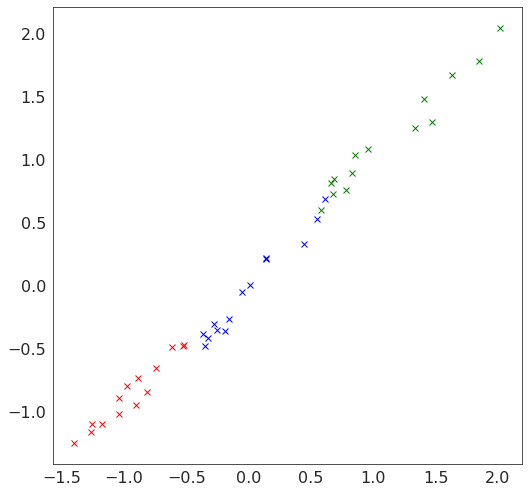

In [ ]:
#plot ดูหน้าตาของ data
#สีฟ้าเป็น Canadian
#สีเเดงเป็น Rosa
#สีเขียวเป็นKama

plotdata(Xtrain, Ytrain)

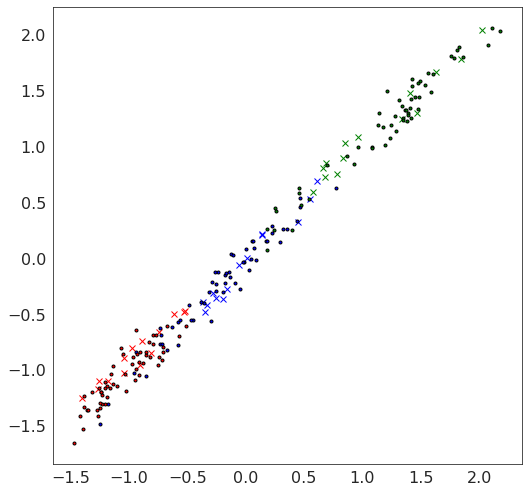

In [ ]:
plotdata(Xtrain, Ytrain, Xtest, Ytest)

#ค้นหาค่า K ที่มีความเเม่นยำที่สุด

<Figure size 432x288 with 0 Axes>

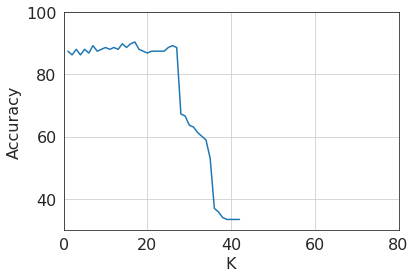

[87.5, 86.30952380952381, 88.09523809523809, 86.30952380952381, 88.09523809523809, 86.90476190476191, 89.28571428571429, 87.5, 88.09523809523809, 88.69047619047619, 88.09523809523809, 88.69047619047619, 88.09523809523809, 89.88095238095238, 88.69047619047619, 89.88095238095238, 90.47619047619048, 88.09523809523809, 87.5, 86.90476190476191, 87.5, 87.5, 87.5, 87.5, 88.69047619047619, 89.28571428571429, 88.69047619047619, 67.26190476190477, 66.66666666666666, 63.69047619047619, 63.095238095238095, 61.30952380952381, 60.11904761904761, 58.92857142857143, 52.976190476190474, 36.904761904761905, 35.714285714285715, 33.92857142857143, 33.33333333333333, 33.33333333333333, 33.33333333333333, 33.33333333333333]


<Figure size 720x720 with 0 Axes>

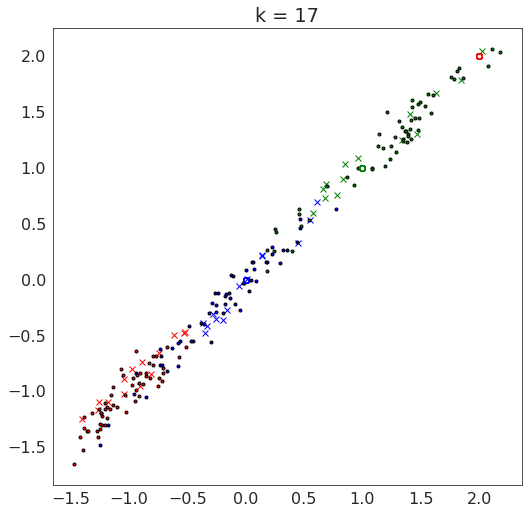

In [ ]:
plt.figure(1)
rate = []
K = range(1, len(Xtrain) +1)

for k in K:

  y_pre = KNN(Xtrain, Ytrain, Xtest, k)
  rate.append(np.sum(y_pre == Ytest) / len(Ytest) * 100) #acc 

plt.figure()
plt.plot(K, rate)
plt.axis( [0, 80, 30, 100])
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
print(rate)

plt.figure(figsize=(10, 10))
k = rate.index(max(rate)) + 1 
z = KNN(Xtrain, Ytrain, Xtest, k)
plotdata(Xtrain, Ytrain, Xtest, Ytest, z)
plt.title('k = '+str(k))
plt.show()

# Train model KNN

In [ ]:
#ค่า K ที่ดีที่สุดก็คือ k = 6
y_pre = KNN(Xtrain, Ytrain, Xtest, k = 17)

In [ ]:
for i in y_pre[0:5]:
  print(f'ผมทดสอบจากข้อมูล {classes[y_pre[i]]} คำตอบจริงคือ {classes[Ytest[i]]}')

print(f'\nAccuracy {np.sum(y_pre == Ytest) / len(Ytest) * 100}')

ผมทดสอบจากข้อมูล Canadian คำตอบจริงคือ Canadian
ผมทดสอบจากข้อมูล Canadian คำตอบจริงคือ Canadian
ผมทดสอบจากข้อมูล Canadian คำตอบจริงคือ Canadian
ผมทดสอบจากข้อมูล Canadian คำตอบจริงคือ Canadian
ผมทดสอบจากข้อมูล Canadian คำตอบจริงคือ Canadian

Accuracy 90.47619047619048


In [ ]:
pre = pd.DataFrame({'(Actual)':Ytest, '(Predicted)':y_pre})  #เปรียบเทียบ ค่าจริง-ผลทำนาย
pre

,(Actual),(Predicted)
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
163,2,0
164,2,2
165,2,2
166,2,2


# Evalution model KNN

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
#Test for classification
print(classification_report(Ytest, y_pre, target_names=classes))

              precision    recall  f1-score   support

    Canadian       0.81      0.93      0.87        56
        Kama       0.98      0.91      0.94        56
        Rosa       0.94      0.88      0.91        56

    accuracy                           0.90       168
   macro avg       0.91      0.90      0.91       168
weighted avg       0.91      0.90      0.91       168



# Confusion Matrix of KNN

Confusion matrix, without normalization


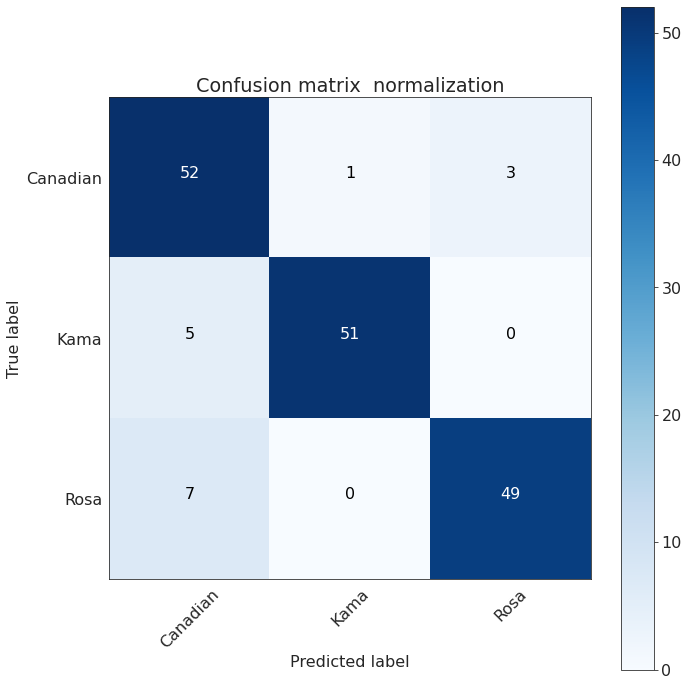

In [ ]:
cnf_matrix = confusion_matrix(Ytest, y_pre)
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix  normalization')

plt.show()

Normalized confusion matrix


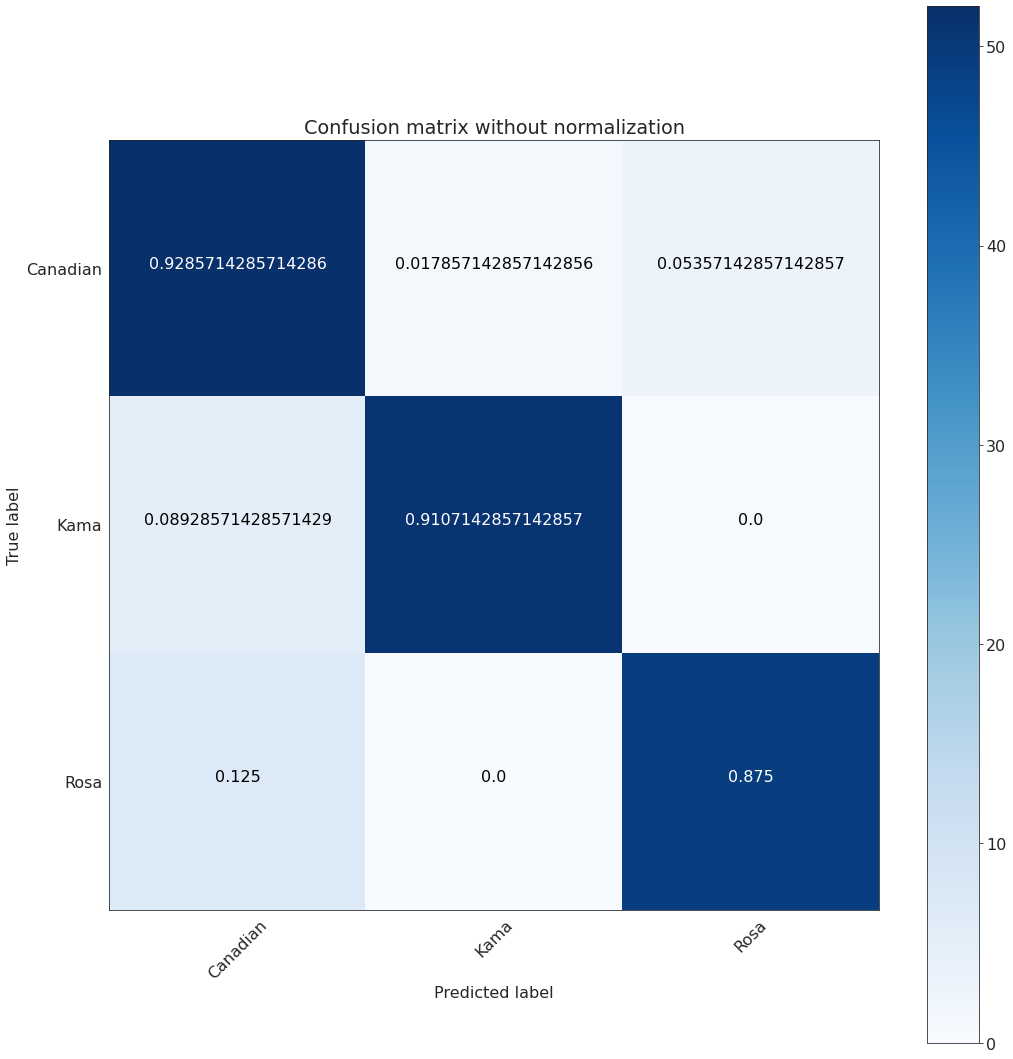

In [ ]:
cnf_matrix = confusion_matrix(Ytest, y_pre)
np.set_printoptions(precision=2)

plt.figure(figsize=(15,15))

plot_confusion_matrix(cnf_matrix, classes=classes,
                      normalize = True,
                      title='Confusion matrix without normalization')

plt.show()

# Train Model Decetion Tree

In [ ]:
from sklearn import tree
from io import StringIO
from sklearn.tree import export_graphviz 
import pydotplus                         
from IPython.display import Image       

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(Xtrain, Ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

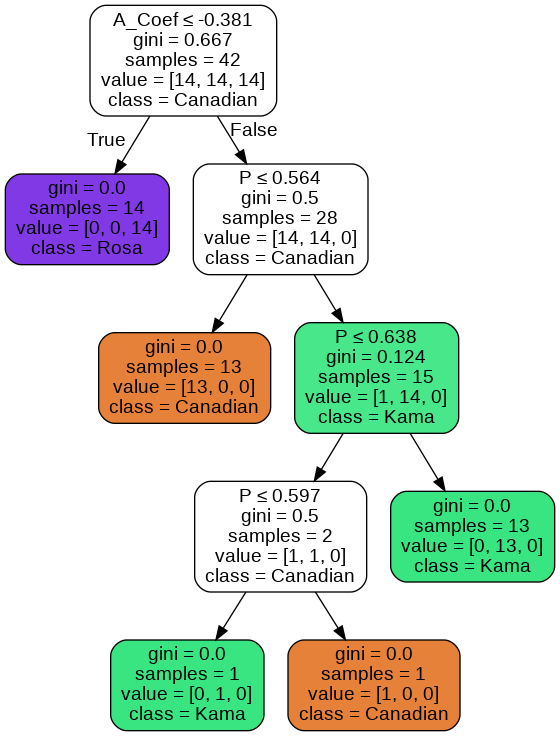

In [ ]:
#ขอก็อปอาจารย์หน่อยนะครับ 555+
dot_data = StringIO()
export_graphviz(clf, 
                out_file = dot_data,
                feature_names = features,
                class_names = classes,
                filled = True,
                rounded = True,
                special_characters = True
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('result.png')
Image(graph.create_png())

In [ ]:
predict = clf.predict(Xtest)

In [ ]:
#ทดสอบ 
print(f'\nAccuracy {np.sum(predict == Ytest) / len(Ytest) * 100}')


Accuracy 84.52380952380952


# Evalution mode DecisionTree

In [ ]:
print(classification_report(Ytest, y_pre, target_names=classes))

              precision    recall  f1-score   support

    Canadian       0.81      0.93      0.87        56
        Kama       0.98      0.91      0.94        56
        Rosa       0.94      0.88      0.91        56

    accuracy                           0.90       168
   macro avg       0.91      0.90      0.91       168
weighted avg       0.91      0.90      0.91       168



# Confusion Matrix of Decision

Confusion matrix, without normalization


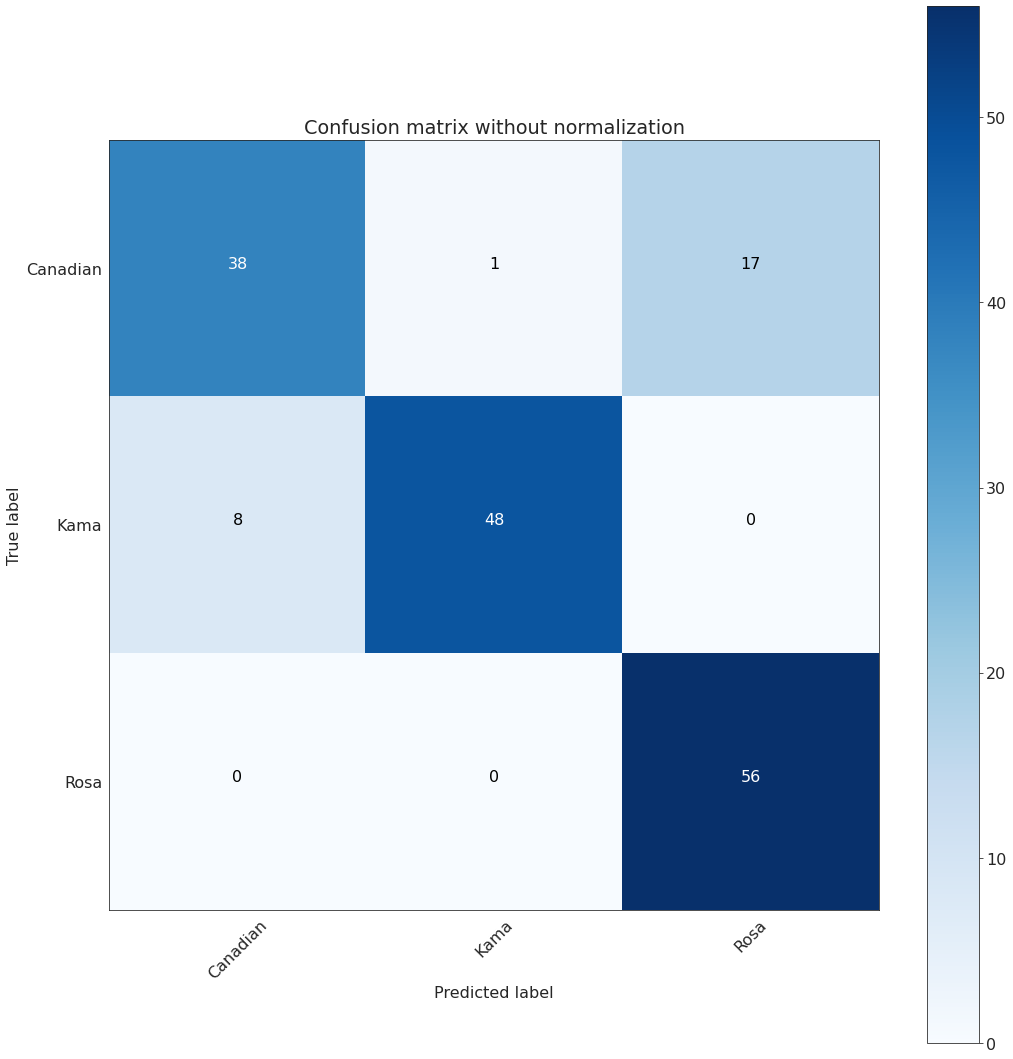

In [ ]:
cnf_matrix = confusion_matrix(Ytest, predict)
np.set_printoptions(precision=2)

plt.figure(figsize=(15,15))

plot_confusion_matrix(cnf_matrix, classes=classes,
                      normalize = False,
                      title='Confusion matrix without normalization')

plt.show()

Normalized confusion matrix


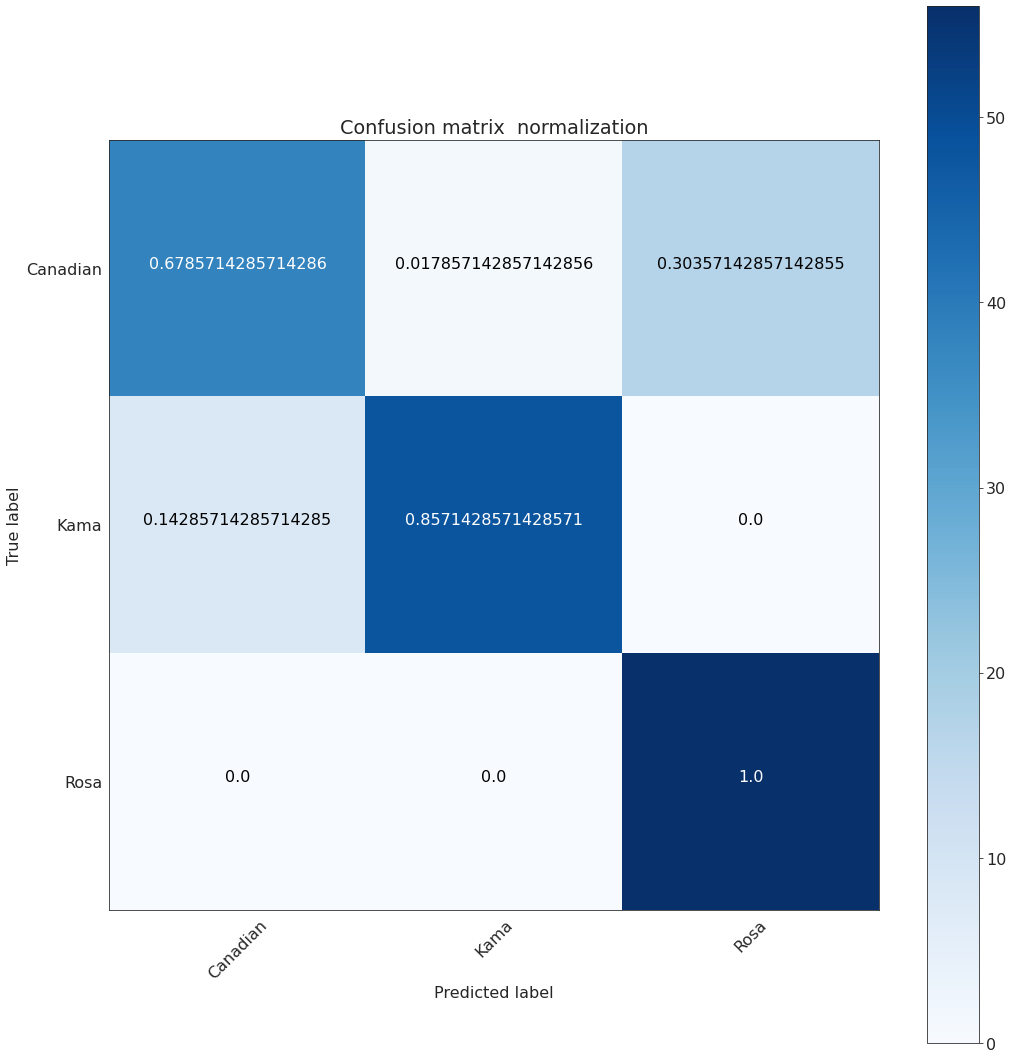

In [ ]:
cnf_matrix = confusion_matrix(Ytest, predict)
np.set_printoptions(precision=2)

plt.figure(figsize=(15,15))

plot_confusion_matrix(cnf_matrix, classes=classes,
                      normalize = True,
                      title='Confusion matrix  normalization')

plt.show()

#เปลี่ยบเทียบสอง Model 

In [ ]:
Ytest.shape

(168,)

In [ ]:
#precision เช็คความเเม่นยำของ model 
#recall เช็คความถูกต้องของโมง model
#accuracy เช็คความเเม่นยำของ model
#f1-socre เช็คหาค่าเฉลี่ยของทั้ง precision และ recall

print(f'\t\t\t\tKNN Model \n{classification_report(Ytest, y_pre, target_names=classes)}  \n\t\t\tDecisionTree Model\n\n{classification_report(Ytest, predict, target_names=classes)}')

				KNN Model 
              precision    recall  f1-score   support

    Canadian       0.81      0.93      0.87        56
        Kama       0.98      0.91      0.94        56
        Rosa       0.94      0.88      0.91        56

    accuracy                           0.90       168
   macro avg       0.91      0.90      0.91       168
weighted avg       0.91      0.90      0.91       168
  
			DecisionTree Model

              precision    recall  f1-score   support

    Canadian       0.83      0.68      0.75        56
        Kama       0.98      0.86      0.91        56
        Rosa       0.77      1.00      0.87        56

    accuracy                           0.85       168
   macro avg       0.86      0.85      0.84       168
weighted avg       0.86      0.85      0.84       168

